# **Abandono de clientes de tarjeta de crédito**

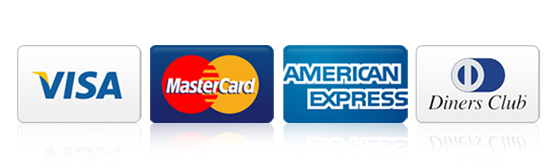

## **0. Datos y librerías**

Los datos que utilizaremos en este proyecto son tomados de Kaggle de un *dataset* público subido a finales del año de 2020.\
Este dataset lo encontraremos en este [enlace](https://www.kaggle.com/sakshigoyal7/credit-card-customers) y viene en formato csv, sin embargo cabe aclarar que este *dataset* fue recolectado a su vez de la página [Leaps](https://leaps.analyttica.com/) que es una página de cursos online.

A continuación importaremos las librerías de python que ocuparemos:

In [166]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110

In [2]:
# Para estadística
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [127]:
# Para modelos de machine learning
import sklearn
from sklearn import model_selection, metrics, linear_model, tree, pipeline, decomposition, neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [5]:
#TEST_CELL
!python --version
print('Scikit-learn', scipy.__version__)
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

Python 3.7.12
Scikit-learn 1.4.1
SciPy 1.4.1
statsmodels 0.10.2
Pandas 1.1.5
NumPy 1.19.5
Matplotlib 3.2.2
Seaborn 0.11.2


Este material fue ralizado con las siguientes versiones:

* SciPy 1.4.1
* Scikit-learn 1.4.1
* statsmodels 0.10.2
* Python 3.7.12
* Pandas 1.1.5
* NumPy 1.19.5
* Matplotlib 3.2.2
* Seaborn 0.11.2





### **0.1. Lectura de los datos**

En esta ocación cargaremos los datos directamente a google colaboratory y los cargaremos en un *DataFrame* en la siguiente linea de código:

In [6]:
churn = pd.read_csv('BankChurners.csv')

## **1. Entendimiento del negocio**

En este proyecto tenemos un conjunto de datos que representan el *churn* de clientes de tarjeta de crédito, la descerción de clientes de un banco en su portafolio de tarjetas de crédito. Subido por el gerente de un banco no especificado, esta preocupado por la cada vez mayor deserción de sus clientes de este producto en particular, espera que desarrollemos un sistema predictivo que le ayude a revertir esta situación, prediciendo que clientes abandonaran el producto para ofrecerles mejores condiciones haciendo que tomen una desición totalmente distinta.

Los datos constan de 10000 clientes con caracteristicas como su edad, salario, estado civil, el limite de su tarjeta de credito, la categoría de su tarjeta de credito entre alrededor de 18 caracteristicas.

Dado que solo tenemos un 16.07% de clientes que han desistido de continuar con el producto de su tarjeta de crédito, será dificil entrenar un buen modelo predictivo, sin embargo en esta primera parte del proyecto solo nos centraremos en el análisis de estos datos y su presentación en forma de informe para la inteligencia de negocio (*BI*).

## **2. Entendimiento de los datos**

Procedemos ahora a explorar que contiene nuestra tabla de datos.

In [7]:
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Algo que cabe resaltar son las últimas 2 columnas, estas fueron subidas junto con el resto de los datos, y es que el publicador mismo lo menciona y sugiere su eliminación en la fase de limpieza de datos, lo cual haremos cuando llegue el momento.

In [9]:
churn.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [10]:
churn.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

Con lo que podemos ver en la parte de arriba cada sujeto tiene caracteristicas muy importantes en cuanto al análisis de crédito de cualquier banco, de esta manera podemos saber que no tenemos muchos datos basura, aparte de las últimas 2 columnas como ya habiamos comentado anteriormente, que corresponden a un intento predictorio mediante una distribución bayesiana. vemos bastantes variables numéricas y algunas categóricas con las que se nos facilitara el trabajo, por ejemplo el nivel educativo de una persona con respecto a su edad podría darnos algun indicio de sus años de experiencia y corelacionarlo con su salario actual que entra dentro de una clasificasión categórica, dandoles un limite de crédito y una categoría en sus tarjetas de crédito. Incluso vemos la cantidad de meses inactivos en el último año, que a primera vista puede ser una señal evidente de que alguien podría abandonar su tarjeta de crédito.

Algo que podemos ver a simple vista es la falta de información acerca de la franquisia a la que pertenecen las tarjetas de crédito de los clientes, siendo esta información una posible causa de abandono, dado que cada franquisia tiene sus propios beneficios, aunque puede que no sea tan relevante como creemos no tendremos la posibilidad con los datos actuales de poner esa opción a prueba.\
Tampoco hay datos geográficos que pueden ser relevantes en cuanto a nivel de ingresos por zona, pobreza o facilidades geograficas que se corelacionen con las demás variables que tenemos.

## **3. Preparación de los datos**

En esta sección procederemos con la parte de disponer de los datos que exploramos anteriormente con el fin de dejarlos listos para un análisis de datos posterior.

### **3.1. Limpieza de datos**

Primero empezaremos con lo antes mencionado, la eliminación de las 2 columnas que no nos interesan. Al ser una acción de eliminación siempre es recomendable asegurarse de que se están eliminando los datos que de verdad nos interesa eliminar, incluso crear un nuevo *DataFrame* que no contenga estas columnas. En este caso como definitivamente no quiero de ninguna forma estas columnas las eliminaré del *DataFrame* principal.

In [11]:
churn['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']

0        0.000093
1        0.000057
2        0.000021
3        0.000134
4        0.000022
           ...   
10122    0.000191
10123    0.995270
10124    0.997880
10125    0.996710
10126    0.996620
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Length: 10127, dtype: float64

In [12]:
churn['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

0        0.999910
1        0.999940
2        0.999980
3        0.999870
4        0.999980
           ...   
10122    0.999810
10123    0.004729
10124    0.002118
10125    0.003294
10126    0.003377
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2, Length: 10127, dtype: float64

Estas son las 2 columnas que vamos a eliminar.

In [13]:
churn.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


A continuación miraremos si hay variables con información faltante o nula.

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Como podemos observar columna debería tener 10127 entradas, y al correr el comando anterior nos da la respuesta que siempre quisieramos oir al trabajar con datos, y es que cada columna tiene sus 10127 datos no nulos. Sin embargo hay casos en los que en vez de un valor nulo se puso la cadena de caracteres 'Unkown' o desconocido en español, lo cual puede ser una categoría interesante para revisar dependiendo de la variable, por lo que no los cambiaré.

Así mismo podemos ver que las variables son del tipo correspondiente a la información que contienen por lo que por el momento no haremos ninguna transformación. Además en este caso vemos oportuno mantener el nombre de las columnas como están ya que es más fácil manejarlas en inglés y son bastante intuitivas.

## **4. Análisis de datos**

En esta sección procederemos a hacer el analisis de los datos que recolectamos y limpiamos anteriormente.

### **4.1. Análisis estadístico**

En esta parte haremos un análisis estadístico respecto a los datos y como se relacionan entre si.

#### 4.1.1. Intervalo de Confianza

Comenzaremos por calcular el intervalo de confianza de la proporción de clientes que abandonan su tarjeta de crédito.

Podemos ver a continuación que hay solo 2 posibilidades, un cliente existente y un cliente desertor.

In [15]:
churn['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [16]:
churn['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Acá hicimos un conteo de ambos casos, dando como resultado 8500 clientes existentes y 1627 desertores. con lo que abajo podremos comprobar que los desertores son el 16% aproximadamente.

In [17]:
porcDesetores = 1627*100/10127
porcDesetores

16.065962279055988

Con esto podemos calcular el intervalo de confianza.

**$$Estimación\ del\ parámetro\ \pm Margen\ de\ error$$**

La *estimación del parámetro* es igual a la proporción de la muestra *p*.

In [18]:
p = 0.16065962279055988 # La proporción se expresa en valores de 0 a 1, lo que equivale al 16.06%
p

0.16065962279055987

In [19]:
n = churn['Attrition_Flag'].loc[(churn['Attrition_Flag'] == 'Attrited Customer')].count()
n

1627

Por comodidad usaremos statsmodels en vez del método análitico para conseguir el limite superior y el inferior del intervalo de confianza.

In [20]:
limite_inferior, limite_superior = sm.stats.proportion_confint(n * p, n)
intervalo = (limite_inferior, limite_superior)
print(intervalo)

(0.14281625842780687, 0.17850298715331286)


Este método usa por defecto un nivel de confianza del $95\%$, por lo que la proporción de desertores de la tarjeta de crédito está entre el $14.28\%$ y el $17.85\%$. Aunque siendo una base de datos interna de una empresa probablemente los valores sean exactos, sin embargo continuaremos manejando estos valores de error (sobre todo por ser datos de lo que parece un banco ficticio con datos aparentemente aleatorios).

#### 4.1.2. Análisis por género

En esta sección intentaremos encontrar algun indicio de diferencias entre generos respecto a los datos y sobre todo al abandono de las tarjetas de crédito e ingresos. Si se encontrasen indicios se harán las respectivas pruebas de hipotesis en la sección de análisis de correlación.

Empecemos viendo la proporción entre hombres y mujeres.


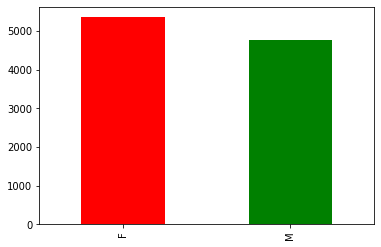

In [21]:
churn['Gender'].value_counts().plot(kind='bar', color={"red": "F", "green": "M"})

In [22]:
churn['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [23]:
print(f'Las mujeres son el {round(5358*100/10127)}% del total de los clientes.')
print(f'Los hombres son el {round(4769*100/10127)}% del total de los clientes.')

Las mujeres son el 53% del total de los clientes.
Los hombres son el 47% del total de los clientes.


Al haber una pequeña diferencia entre ambos géneros en número a favor de las mujeres, debería haber una diferencia igualmente pequeña en la cantidad de clientes que abandonan sus tarjetas de crédito a favor de las mujeres.

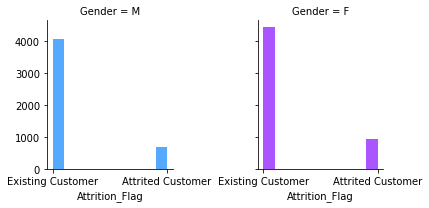

In [24]:
churn_sex_att = sns.FacetGrid(churn, col='Gender', palette='cool', hue='Gender')
churn_sex_att = churn_sex_att.map(plt.hist, 'Attrition_Flag')

In [25]:
# Mujeres
churn['Attrition_Flag'].loc[churn['Gender'] == 'F'].value_counts()

Existing Customer    4428
Attrited Customer     930
Name: Attrition_Flag, dtype: int64

In [26]:
# Hombres
churn['Attrition_Flag'].loc[churn['Gender'] == 'M'].value_counts()

Existing Customer    4072
Attrited Customer     697
Name: Attrition_Flag, dtype: int64

La diferencia en la cantidad de clientes que abandonan sus tarjetas de crédito según su género no es lo suficientemente alta como para asegurar que sea un factor influyente en esta correlación y se debe en mayor medida a la mayor cantidad de mujeres en la población, como habiamos predicho, por lo que continuaremos.

La edad de la población en ambos géneros es muy similar.

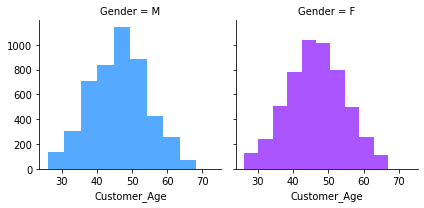

In [27]:
churn_sex_dist = sns.FacetGrid(churn, col='Gender', palette='cool', hue='Gender')
churn_sex_dist = churn_sex_dist.map(plt.hist, 'Customer_Age')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


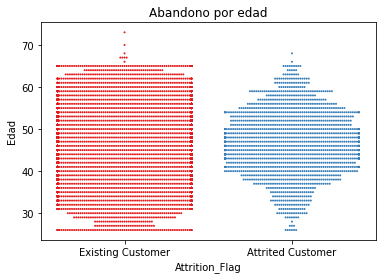

In [28]:
churn_edades = sns.swarmplot(x='Attrition_Flag', y='Customer_Age', data=churn, palette='Set1', dodge=True, size=2)
plt.title('Abandono por edad')
plt.ylabel('Edad')

churn_edades

Como vemos en la zona de edades donde más personas hay, hay más personas que abandonan la tarjeta de crédito por lo que no hay una correlación aparente entre ambas variables.

Continuaremos con una parte muy polémica últimamente, la brecha salarial.
Dividimos las categorías de ingresos entre hombres y mujeres.

In [29]:
# Creamos una lista para las columnas de la siguiente gráfica y la ordenamos
income = churn['Income_Category'].unique().tolist()
income[0], income[1] = income[1], income[0]
income[3], income[1] = income[1], income[3]
income[2], income[3] = income[3], income[2]
income

['Less than $40K',
 '$40K - $60K',
 '$60K - $80K',
 '$80K - $120K',
 '$120K +',
 'Unknown']

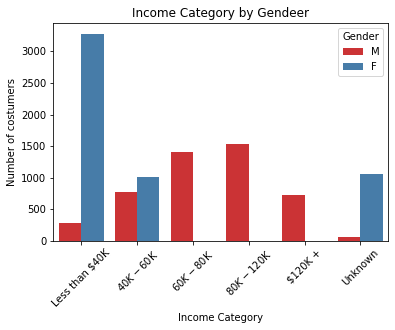

In [30]:
incomes = sns.countplot(x='Income_Category', data=churn, hue='Gender', palette='Set1', order=income)
incomes.set_xticklabels(incomes.get_xticklabels(), rotation=45)

plt.title('Income Category by Gendeer')
plt.xlabel('Income Category')
plt.ylabel('Number of costumers')

incomes

Vemos que prácticamente todas las mujeres están en la zona de ingresos bajos, mientras que la mayoría de los hombres se encuentran entre los ingresos medio altos a altos. además la mayoría de personas que no declararon sus ingresos son por mucho las mujeres.

Supongamos que el banco usa los ingresos para otorgar una tarjeta de cierta categoría deben tener cierta cantidad de ingresos, de forma tal que gente con ingresos bajos conseguiran una tarjeta tipo blue, de ingresos medios una tarjeta de tipo silver y altos y super altos ingresos tendrán una tarjeta gold y platinum respectivamente, suponiendo eso miremos que cantidad de gente hay en cada categoría de tarjeta de crédito que no haya declarado sus ingresos.

In [31]:
churn['Card_Category'].loc[(churn['Income_Category'] == 'Unknown')].value_counts()

Blue        1045
Silver        53
Gold           9
Platinum       5
Name: Card_Category, dtype: int64

Pero quitemos los hombres, que no son muchos.

In [32]:
churn['Card_Category'].loc[(churn['Income_Category'] == 'Unknown') & (churn['Gender'] == 'F')].value_counts()

Blue        995
Silver       51
Gold          9
Platinum      5
Name: Card_Category, dtype: int64

Vemos que prácticamente no cambian los número pero que los hombres que eliminamos tienen tarjetas que asosiamos a ingresos medios-bajos. Sin embargo lo mismo pasa con las mujeres, es irrisoria la cantidad de mujeres con tarjetas que asosiamos a ingresos medios-altos mientras que prácticamente la totalidad de mujeres que no declararon ingresos tienen una tarjeta asociada a ingresos bajos.

Text(0.5, 1.0, 'Categoría de tarjeta de todos los no declarantes de ingresos')

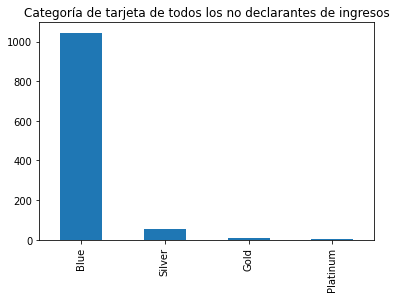

In [33]:
# Hombres y mujeres que no declararon ingresos
churn['Card_Category'].loc[(churn['Income_Category'] == 'Unknown')].value_counts().plot(kind='bar')
plt.title('Categoría de tarjeta de todos los no declarantes de ingresos')

Text(0.5, 1.0, 'Categoría de tarjeta de sólo las mujeres no declarantes de ingresos')

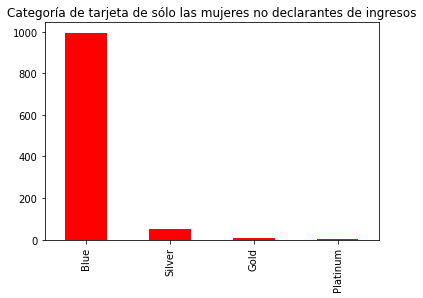

In [34]:
# Mujeres que no declararon ingresos
churn['Card_Category'].loc[(churn['Income_Category'] == 'Unknown') & (churn['Gender'] == 'F')].value_counts().plot(kind='bar', color='red')
plt.title('Categoría de tarjeta de sólo las mujeres no declarantes de ingresos')

Por lo que vemos que puede haber cierta disparidad y brecha de género en los ingresos en este conjunto de datos, pero no tenemos los datos suficientes para afirmar o negar que sea exista esta brecha. Sin embargo no hay evidencia que revele que las mujeres por el hecho de ser mujeres desistan de continuar con la tarjeta de crédito por lo que continuaremos con los siguientes análisis.

#### 4.1.3. Análisis de ingresos según nivel académico

Intentaremos encontrar algún tipo de relación entre ingresos, nivel académico y abandono de tarjeta de crédito.

In [35]:
churn['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

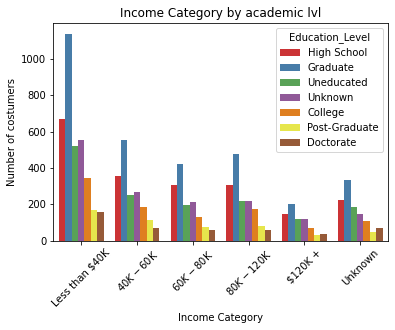

In [36]:
incomes_academic = sns.countplot(x='Income_Category', data=churn, hue='Education_Level', palette='Set1', order=income)
incomes_academic.set_xticklabels(incomes_academic.get_xticklabels(), rotation=45)

plt.title('Income Category by academic lvl')
plt.xlabel('Income Category')
plt.ylabel('Number of costumers')

incomes_academic

Viendo la proporción de la población en cada categoría de ingreso no podemos afirmar que haya una relación entre estudiar y ganar más ingresos.

In [37]:
# Clientes que abandonan segun su nivel académico
churn['Education_Level'].loc[(churn['Attrition_Flag'] == 'Attrited Customer')].value_counts()

Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: Education_Level, dtype: int64

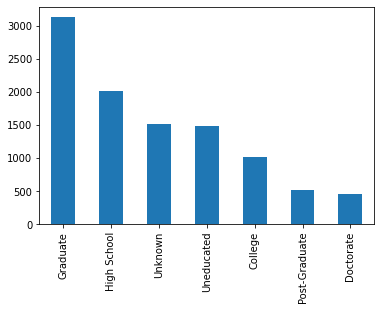

In [38]:
# Total de la muestra
churn['Education_Level'].value_counts().plot(kind='bar')

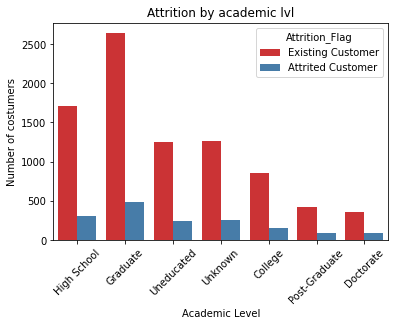

In [39]:
# Deserción y permanencia respecto a nivel académico
attrition_academic = sns.countplot(x='Education_Level', data=churn, hue='Attrition_Flag', palette='Set1')
attrition_academic.set_xticklabels(attrition_academic.get_xticklabels(), rotation=45)

plt.title('Attrition by academic lvl')
plt.xlabel('Academic Level')
plt.ylabel('Number of costumers')

attrition_academic

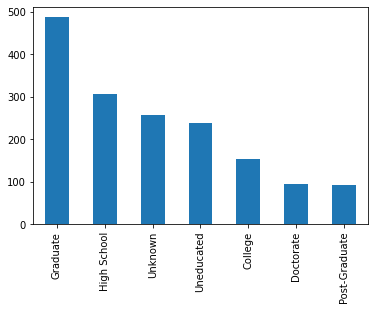

In [40]:
# Desertores totales por nivel educatiovo
churn['Education_Level'].loc[(churn['Attrition_Flag'] == 'Attrited Customer')].value_counts().plot(kind='bar')

Vemos que los clientes desertores siguen el margen poblaciónal del total de los clientes, por lo que no tenemos evidencia de que haya algúna relación entre nivel educativo y la deserción.

### 4.2. Análisis de Correlación

Como vimos anteriormente hay algunas variables que podríamos analizar a primera vista e inferir una posible relación entre ellas, o por el contrario darnos cuenta de que no necesariamente estaban relacionadas en lo más mínimo.

Para ahondar más en el tema y asegurarnos de ver que variables tienen más relación las unas con las otras empezaremos con un analisis de correlaciones donde todas las vaibles se comparen entre se, peor al ser metodos númericos deberemos transformar las variables categóricas dandoles un calor entero. Son 6 variables categóricas que cambiaremos.

In [41]:
churn.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [42]:
#1
churn['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [43]:
churn['Attrition_Flag'] = churn['Attrition_Flag'].map({'Existing Customer' : 0, 'Attrited Customer' : 1}).astype(int)

In [44]:
#2
churn['Gender'].unique()

array(['M', 'F'], dtype=object)

In [45]:
churn['Gender'] = churn['Gender'].map({'M' : 1, 'F' : 0}).astype(int)

In [46]:
churn['Gender'].unique()

array([1, 0])

Tomaremos los clientes que no declararon su nivel académico como posibles usuarios de educación no tradicional, por lo que tendrán su propio valor.

In [47]:
#3
churn['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [48]:
churn['Education_Level'] = churn['Education_Level'].map({'Uneducated' : 0, 'Unknown' : 1, 'High School' : 2, 'College' : 3, 'Graduate' : 4, 'Post-Graduate' : 5, 'Doctorate': 6}).fillna(0).astype(int)

Tomaremos los valores 'Unkown' del estado civil como uniones no convencionales, como lo pueden ser las uniones libres, poliamorosas y también viudez dado que les falto ese estado civil que en Colombia si tenemos.

In [49]:
#4
churn['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [50]:
churn['Marital_Status'] = churn['Marital_Status'].map({'Single' : 0, 'Unknown' : 1, 'Divorced' : 2, 'Married' : 3}).fillna(0).astype(int)

In [51]:
#5
churn['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [52]:
churn['Income_Category'] = churn['Income_Category'].map({'Unknown' : 0, 'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3, '$80K - $120K' : 4, '$120K +' : 5}).fillna(0).astype(int)

In [53]:
#6
churn['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [54]:
churn['Card_Category'] = churn['Card_Category'].map({'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}).fillna(0).astype(int)

Una vez tenemos todas nuestras variables con pesos númericos procederemos a hacer una matriz de correlación, de esta manera veremos gráficamente que variables se relacionan directamente (con un valor positivo cercano a 1) o inversamente (con un valor negativo cercano a -1).

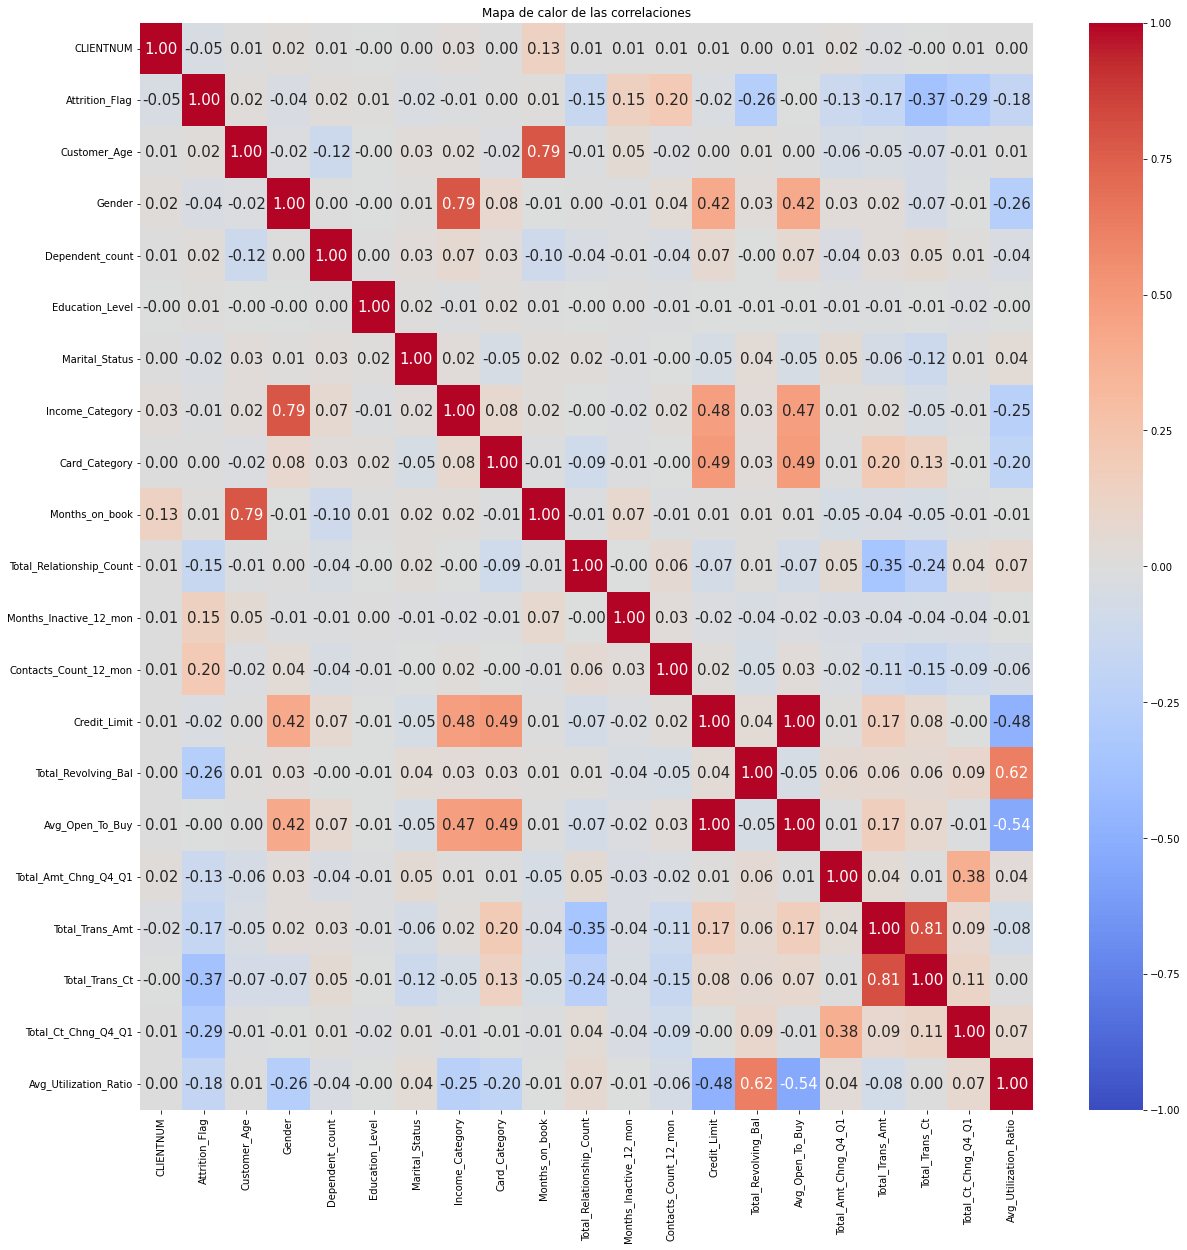

In [55]:
fig, ax = plt.subplots(figsize=(20,20)) # Tamaño desproporcionadamente grande para que pueda ser leído
churn_corr_matrix = sns.heatmap(churn.corr(),
                                annot=True,
                                fmt=r'.2f',
                                cmap='coolwarm',
                                vmin=-1, vmax=1,
                                annot_kws={'size': 15},
                                ax=ax);

plt.title('Mapa de calor de las correlaciones')

churn_corr_matrix

Nota del dueño del *dataset*:
* Total_Relationship_Count: total number of products held by the customers (cards, accounts, etc.)
* Contacts_count_12_mont: I guess it holds the number of times the bank contacted the customer and/or viceversa. There doesn't seem to have any relationship with other fields (e.g. contact clients that left the bank, customers with revolving balance, etc). I guess it has to do with ad campaigns.
* Total_Amt_Chng_Q4_Q1: represents how much the customer increased their expenditure when comparing the 4th quarter agains the 1st.
* Total_Ct_Chng_Q4_Q1: similar to the previous but in number of transactions.

Por como podemos observar no hay ninguna correlación significativa que nos permita predecir con facilidad si un cliente abandonará o no su tarjeta de crédito. Además de las correlaciones obvias de las variables con sigo mismas y la de cupo total y cupo disponible o que entre más se use una tarjeta de crédito hay más crédito rotativo (el número de cuotas totales de la tarjeta no es fijo como lo sería en un crédito convencional) y menos cupo disponible en la tarjeta, el conteo de usos de la tarjeta con la cantidad que representan (y el crecimiento de su uso en los trimestres) hay correlaciónes que veniamos viendo, como el número de meses en la empresa en cuanta más edad tuviera o el de la brecha salarial por genero, este ultimo al parecer no tan lineal en un inicio como los otros merece un análisis propio.

Si bien directamente no hay una variable con una correlación lo suficientemente significativa para revelarnos si habrá o no una deserción en un cliente dado, puede que al ingresar los pesos significativos de todas las variables se pueda predecir con cierta exactitud.

#### 4.2.1. Prueba de hipótesis

Vamos a análizar con una prueba de hipótesis la brecha de género en los salarios que tenemos. aprovecharemos que los valores categóricos de los ingresos les dimos un valor numérico.

Las hipotesis son respecto a los ingresos de los hombres versus los de las mujeres. La significancia será de un 5%.

**Hipótesis:**


*   Hipótesis nula $H_0: \mu_m = \mu_f$
*   Hipótesis alternativa $H_a: \mu_m \gt \mu_f$


Calculamos la media y la desviación estándar de los ingresos de los clientes.

In [56]:
# muestra = total clientes 
ingresos_promedio_muestra = churn['Income_Category'].mean()

print(f'El promedio de los valores de las categorías de ingresos de los clientes es: {ingresos_promedio_muestra}')

El promedio de los valores de las categorías de ingresos de los clientes es: 2.0857114644020935


Calculamos la diferencia entre las medias de ambos grupos.

In [57]:
nf = churn['Income_Category'].loc[(churn['Gender'] == 0)].count()
nf

5358

In [58]:
ingresos_promedio_female = churn['Income_Category'].loc[(churn['Gender'] == 0)].mean()
desv_est_female = churn['Income_Category'].loc[(churn['Gender'] == 0)].std(ddof = 1)

print(f'El promedio de los valores de las categorías de ingresos de los clientes mujeres es: {ingresos_promedio_female}')
print(f'La desviación estándar de la población de mujeres es: {desv_est_female}')

El promedio de los valores de las categorías de ingresos de los clientes mujeres es: 0.9914147069802165
La desviación estándar de la población de mujeres es: 0.6221601641360374


In [59]:
nm = churn['Income_Category'].loc[(churn['Gender'] == 1)].count()
nm

4769

In [60]:
ingresos_promedio_male = churn['Income_Category'].loc[(churn['Gender'] == 1)].mean()
desv_est_male = churn['Income_Category'].loc[(churn['Gender'] == 1)].std(ddof = 1)

print(f'El promedio de los valores de las categorías de ingresos de los hombres es: {ingresos_promedio_male}')
print(f'La desviación estándar de los hombres es: {desv_est_male}')

El promedio de los valores de las categorías de ingresos de los hombres es: 3.3151604109876285
La desviación estándar de los hombres es: 1.1514247359072995


In [61]:
dif = ingresos_promedio_male - ingresos_promedio_female
print(f'La diferencia entre la media de los ingresos entre hombres y mujeres es de: {dif}')

La diferencia entre la media de los ingresos entre hombres y mujeres es de: 2.323745704007412


Calcularemos el error estándar.

In [62]:
error_std = np.sqrt(((nm-1)*desv_est_male**2 + (nf-1)*desv_est_female**2) / (nm + nf - 2)) * np.sqrt((1/nm)+(1/nf))

error_std

0.01812742544838033

Ahora Calculamos nuestro estádistico de test:

In [63]:
estadistico_z_score = dif / error_std

estadistico_z_score

128.18950548849378

Se calcula el *p-valor*, teniendo en cuenta que se trata de una prueba de dos colas ($H_a \neq 0$):

In [64]:
p_valor = (1 - stats.norm.cdf(estadistico_z_score)) * 2
print(p_valor) 

0.0


In [65]:
p_valor < 0.05

True

El *p-valor* s menor al nivel de significancia (5%). Por lo tanto hay evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa. Esto significa que hay evidencia que indica, no sólo que existe la brecha salarial, sino que la brecha es a favor de los hombres. Aunque faltan datos para descubrir el porque de esta brecha.

### 4.3. Análisis de Regresión


#### 4.3.1. Regresión logística

Al ser una opción binaria, si el cliente se queda o se va, es claro que lo que debemos hacer es una regresión logística.

In [66]:
churn.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [67]:
model = sm.GLM.from_formula("Attrition_Flag ~ Customer_Age + Gender + Dependent_count + Education_Level + Marital_Status + Income_Category + Card_Category + Months_on_book + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal + Avg_Open_To_Buy + Total_Amt_Chng_Q4_Q1 + Total_Trans_Amt + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1 + Avg_Utilization_Ratio", family=sm.families.Binomial(), data=churn)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                            GLM   Df Residuals:                    10108
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2367.2
Date:                Sun, 07 Nov 2021   Deviance:                       4734.5
Time:                        17:58:26   Pearson chi2:                 9.78e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.8579      0.375     15.613      0.000       5.123       6.593
Customer_Age                -0.0050      0.008     -0.658      0.510      -0.020       0.010
Gender                      -0.9684      0.127     -7.636      0.000      -1.217      -0.720
Dependent_count              0.1359      0.030      4.563      0.000       0.078       0.194
Education_Level              0.0112      0.022      0.503      0.615      -0.032       0.055
Marital_Status              -0.1989      0.028     -7.197      0.000      -0.253      -0.145
Income_Category              0.1574      0.044      3.560      0.000       0.071       0.244
Card_Category                0.3933      0.126      3.120      0.002       0.146       0.640
Months_on_book              -0.0060      0.008     -0.784      0.433      -0.021       0.009
Total_Relationship_Count    -0.4494      0.027    -16.386      0.000      -0.503      -0.396
Months_Inactive_12_mon       0.5079      0.038     13.425      0.000       0.434       0.582
Contacts_Count_12_mon        0.5118      0.036     14.049      0.000       0.440       0.583
Credit_Limit                -0.0003   2.27e-05    -14.085      0.000      -0.000      -0.000
Total_Revolving_Bal         -0.0006    4.7e-05    -13.313      0.000      -0.001      -0.001
Avg_Open_To_Buy              0.0003   2.47e-05     12.398      0.000       0.000       0.000
Total_Amt_Chng_Q4_Q1        -0.4110      0.187     -2.198      0.028      -0.778      -0.044
Total_Trans_Amt              0.0005   2.28e-05     21.088      0.000       0.000       0.001
Total_Trans_Ct              -0.1181      0.004    -31.902      0.000      -0.125      -0.111
Total_Ct_Chng_Q4_Q1         -2.8106      0.188    -14.929      0.000      -3.180      -2.442
Avg_Utilization_Ratio       -0.1267      0.244     -0.518      0.604      -0.606       0.352
============================================================================================
"""

Para hacer más preciso el modelo lo harems eliminandole las variables con un *p-valor* mayor.

In [68]:
model = sm.GLM.from_formula("Attrition_Flag ~ Gender + Dependent_count + Marital_Status + Income_Category + Card_Category  + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal + Avg_Open_To_Buy + Total_Amt_Chng_Q4_Q1 + Total_Trans_Amt + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1", family=sm.families.Binomial(), data=churn)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                            GLM   Df Residuals:                    10112
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2369.9
Date:                Sun, 07 Nov 2021   Deviance:                       4739.9
Time:                        17:58:29   Pearson chi2:                 9.95e+03
No. Iterations:                    47                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.3954      0.281     19.212      0.000       4.845       5.946
Gender                      -0.9456      0.126     -7.500      0.000      -1.193      -0.699
Dependent_count              0.1453      0.029      4.926      0.000       0.087       0.203
Marital_Status              -0.2009      0.028     -7.282      0.000      -0.255      -0.147
Income_Category              0.1507      0.044      3.418      0.001       0.064       0.237
Card_Category                0.3937      0.126      3.123      0.002       0.147       0.641
Total_Relationship_Count    -0.4475      0.027    -16.344      0.000      -0.501      -0.394
Months_Inactive_12_mon       0.4981      0.037     13.289      0.000       0.425       0.572
Contacts_Count_12_mon        0.5128      0.036     14.101      0.000       0.441       0.584
Credit_Limit                -0.0003   1.58e-05    -20.779      0.000      -0.000      -0.000
Total_Revolving_Bal         -0.0006   3.08e-05    -20.921      0.000      -0.001      -0.001
Avg_Open_To_Buy              0.0003   1.55e-05     20.388      0.000       0.000       0.000
Total_Amt_Chng_Q4_Q1        -0.3795      0.186     -2.039      0.041      -0.744      -0.015
Total_Trans_Amt              0.0005   2.27e-05     21.204      0.000       0.000       0.001
Total_Trans_Ct              -0.1178      0.004    -31.950      0.000      -0.125      -0.111
Total_Ct_Chng_Q4_Q1         -2.8236      0.188    -15.004      0.000      -3.192      -2.455
============================================================================================
"""

Lo Hacemos de nuevo.

In [69]:
model = sm.GLM.from_formula("Attrition_Flag ~ Gender + Dependent_count + Marital_Status + Income_Category + Card_Category  + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal + Avg_Open_To_Buy + Total_Trans_Amt + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1", family=sm.families.Binomial(), data=churn)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                            GLM   Df Residuals:                    10113
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.1
Date:                Sun, 07 Nov 2021   Deviance:                       4744.1
Time:                        17:58:31   Pearson chi2:                 9.96e+03
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.2028      0.264     19.744      0.000       4.686       5.719
Gender                      -0.9431      0.126     -7.488      0.000      -1.190      -0.696
Dependent_count              0.1463      0.029      4.961      0.000       0.089       0.204
Marital_Status              -0.2023      0.028     -7.337      0.000      -0.256      -0.148
Income_Category              0.1506      0.044      3.418      0.001       0.064       0.237
Card_Category                0.3926      0.126      3.115      0.002       0.146       0.640
Total_Relationship_Count    -0.4497      0.027    -16.430      0.000      -0.503      -0.396
Months_Inactive_12_mon       0.5000      0.037     13.339      0.000       0.427       0.573
Contacts_Count_12_mon        0.5134      0.036     14.123      0.000       0.442       0.585
Credit_Limit                -0.0003   1.58e-05    -20.793      0.000      -0.000      -0.000
Total_Revolving_Bal         -0.0006   3.08e-05    -20.934      0.000      -0.001      -0.001
Avg_Open_To_Buy              0.0003   1.55e-05     20.398      0.000       0.000       0.000
Total_Trans_Amt              0.0005   2.27e-05     21.083      0.000       0.000       0.001
Total_Trans_Ct              -0.1176      0.004    -31.889      0.000      -0.125      -0.110
Total_Ct_Chng_Q4_Q1         -2.9567      0.177    -16.658      0.000      -3.305      -2.609
============================================================================================
"""

In [70]:
model = sm.GLM.from_formula("Attrition_Flag ~ Gender + Dependent_count + Marital_Status + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal + Avg_Open_To_Buy + Total_Trans_Amt + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1", family=sm.families.Binomial(), data=churn)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                            GLM   Df Residuals:                    10115
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2381.3
Date:                Sun, 07 Nov 2021   Deviance:                       4762.7
Time:                        17:58:33   Pearson chi2:                 9.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.3072      0.261     20.320      0.000       4.795       5.819
Gender                      -0.6647      0.084     -7.955      0.000      -0.829      -0.501
Dependent_count              0.1535      0.029      5.245      0.000       0.096       0.211
Marital_Status              -0.2007      0.028     -7.296      0.000      -0.255      -0.147
Total_Relationship_Count    -0.4514      0.027    -16.517      0.000      -0.505      -0.398
Months_Inactive_12_mon       0.4956      0.037     13.253      0.000       0.422       0.569
Contacts_Count_12_mon        0.5081      0.036     14.055      0.000       0.437       0.579
Credit_Limit                -0.0003   1.56e-05    -20.522      0.000      -0.000      -0.000
Total_Revolving_Bal         -0.0006   3.07e-05    -20.806      0.000      -0.001      -0.001
Avg_Open_To_Buy              0.0003   1.55e-05     20.619      0.000       0.000       0.000
Total_Trans_Amt              0.0005   2.25e-05     21.250      0.000       0.000       0.001
Total_Trans_Ct              -0.1172      0.004    -31.898      0.000      -0.124      -0.110
Total_Ct_Chng_Q4_Q1         -2.9619      0.177    -16.715      0.000      -3.309      -2.615
============================================================================================
"""

Con esto ya tenemos la regresión logística lo suficientemente precisa.

In [71]:
result.params

Intercept                   5.307209
Gender                     -0.664741
Dependent_count             0.153548
Marital_Status             -0.200676
Total_Relationship_Count   -0.451387
Months_Inactive_12_mon      0.495583
Contacts_Count_12_mon       0.508127
Credit_Limit               -0.000319
Total_Revolving_Bal        -0.000638
Avg_Open_To_Buy             0.000319
Total_Trans_Amt             0.000479
Total_Trans_Ct             -0.117250
Total_Ct_Chng_Q4_Q1        -2.961883
dtype: float64

## 5. Modelos de Machine Learning

En esta sección lo que buscaremos utilizar distintos modelos de *machine learning* de forma que mejoremos el modelo de regresión logística que implementamos tan tardada y manualmente, para conseguir mejores resultados y más precisos. 

Al haber dado valores numéricos a las variables categóricas, no hace falta pasarle un array al método .fit() con los pesos que nos gustaría darles a cada una de las variables en el parámetro *sample_weight* de los diferenter modelos.

El dataset aún no está balanceado por lo que haremos los mismos procesos al final con el dataset balanceado para comparar los puntajes.

### 5.1. División del conjunto de datos

Usaremos el conjunto de datos que ya preparamos anteriormente para el mapa de correlación, además de eso debemos dividir el conjunto de datos de tal forma que tengamos en una variable un *DataFrame* con todos los datos y variables y en otra variable la columna objetivo que en nuestro caso es si el cliente se queda o se va.

In [270]:
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,2,3,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,4,0,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,4,3,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,2,1,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,0,3,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [271]:
X = churn.drop(['Attrition_Flag'], axis=1)
X = X.drop(['CLIENTNUM'], axis=1) #En los modelos no hace falta un identificador unico, ya hay indices, y este número empeora el modelo
y = churn['Attrition_Flag'].squeeze()

In [272]:
print(X.shape)
print(y.shape)

(10127, 19)
(10127,)


Una vez tenemos dividido el conjunto entre variables y objetivos, dividiremos ambos en 2 partes, una para entrenar el modelo, y otra para probarlo, estas divisiones deben ser iguales para ambas variables.

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7, stratify=y)

In [274]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7088, 19)
(3039, 19)
(7088,)
(3039,)


A partir de este punto ya podemos crear nuestros modelos.

### 5.2. Regresión logística
Lo primero que vamos a hacer es mejorar nuestra predicción de regresión logística anterior usando *Machine Learning*.

In [275]:
rl = linear_model.LogisticRegression(random_state=7).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [276]:
y_pred_rl = rl.predict(X_test)

Ya tenemos el modelo de regresión logística, miraremos su rendimiento más adelante.

### 5.3. Árboles de desición

A continuación intentaremos hacer un modelo que prediga si un cliente se queda o se va usando arboles de desición, además compararemos los arboles regresosres con los clasificadores para este caso.

In [280]:
adr = tree.DecisionTreeRegressor(random_state=7).fit(X_train, y_train)
adc = tree.DecisionTreeClassifier(random_state=7).fit(X_train, y_train)

In [281]:
y_pred_adr = adr.predict(X_test)
y_pred_adc = adc.predict(X_test)

Ya tenemos los modelos de árboles de desición, exploraremos las métricas de los resultados más adelante.

### 5.4. Neural Networks

Haremos el mismo proceso anterior con los *Neural Networks* de tipo clasificasión y de tipo regresor.

In [282]:
nnr = MLPRegressor(random_state=7, learning_rate='adaptive', max_iter=1000).fit(X_train, y_train)
nnc = MLPClassifier(random_state=7, max_iter=100).fit(X_train, y_train)

In [283]:
y_pred_nnr = nnr.predict(X_test)
y_pred_nnc = nnc.predict(X_test)

Ya tenemos los modelos de las redes neurales, adelante compararemos sus puntajes.

### 5.5. Métricas de los modelos

En esta sección analizaremos métricas y resultados de las predicciones que hagan los modelos con los datos de prueba, de esta manera seleccionaremos el modelo que mejor desempeño tenga en nuestro conjunto de datos.

'Existing Customer' : 0, 'Attrited Customer' : 1

En este caso un verdadero positivo sería un cliente que se va, y un verdadero negativo sería un cliente que se quede, por lo que nos interesa tener más falsos positivos que falsos negativos porque nos interesa prevenir la mayor cantidad de clientes que se van, incluso si realmente no se van.

In [284]:
print(f'El puntaje del "score" del modelo de regresión logística es:                {rl.score(X_test, y_test)}')
print(f'El puntaje del "score" del modelo de árbol de desición de regresión es:     {adr.score(X_test, y_test)}')
print(f'El puntaje del "score" del modelo de árbol de desición de clasificación es: {adc.score(X_test, y_test)}')
print(f'El puntaje del "score" del modelo de red neural de regresión es:           {nnr.score(X_test, y_test)}')
print(f'El puntaje del "score" del modelo de red neural de clasificación es:        {nnc.score(X_test, y_test)}')

El puntaje del "score" del modelo de regresión logística es:                0.8769332017110891
El puntaje del "score" del modelo de árbol de desición de regresión es:     0.4360866198404997
El puntaje del "score" del modelo de árbol de desición de clasificación es: 0.9239881539980257
El puntaje del "score" del modelo de red neural de regresión es:           -124.02604776851524
El puntaje del "score" del modelo de red neural de clasificación es:        0.8779203685422836


Nota: En este punto medimos que el score sea positivo, de forma que de un valor que refleje que el modelo este trabajando bien, porque cada modelo puede devolver distintos tipos de score. 

Con solo el *score* podemos ver unos cuantos modelos que tienen ventaja, en primer lugar el árbol de desición de clasificación y en un empate por el segundo lugar la regresión logística y la red neural de clasificación.

Además vemos que la red neural de regresión tiene muy mal puntaje, y esto es porque en vez de dar 1 y 0, da el error cuadratico medio, por lo que no lo usaremos más.

In [285]:
y_pred_nnr

array([ 3.87134148,  0.70550207, -6.61833595, ...,  7.79346447,
       -0.76231575,  0.78893771])

In [286]:
def puntajes(y_pred):
  acc = metrics.accuracy_score(y_test, y_pred) # Accuracy o exactitud
  pre = metrics.precision_score(y_test, y_pred, average='micro') # Precisión de las predicciones, usando micro para hayar los verdaderos positivos, los falso positivos y negativos
  cr = metrics.classification_report(y_test, y_pred) # Resumen de varias métricas
  cm = metrics.confusion_matrix(y_test, y_pred)
  return acc, pre, cr, cm

In [287]:
a, p, c, m = puntajes(y_pred_rl)
ac, pr, cr, ma = puntajes(y_pred_adr)
acc, pre, cre, mat = puntajes(y_pred_adc)
accu, pred, crep, matr = puntajes(y_pred_nnc)

In [288]:
score_df = pd.DataFrame(np.array([['Regresión Logístic', a, p], ['Árbol de desición regresión', ac, pr], ['Árbol de desición clasificación', acc,  pre],['Red neural clasificación', accu, pred]]),
                   columns=['Modelo', 'Accuracy', 'Precision']).set_index('Modelo')
score_df

,Accuracy,Precision
Modelo,,
Regresión Logístic,0.8769332017110891,0.8769332017110891
Árbol de desición regresión,0.9239881539980257,0.9239881539980257
Árbol de desición clasificación,0.9239881539980257,0.9239881539980257
Red neural clasificación,0.8779203685422836,0.8779203685422836


Vemos que en *Accuracy* y precisión están empatados los árboles de desición con valores idénticos por el primer lugar, al igual que la red neural de clasificación con la regresión lodística con su empate por el $3^{er}$ puesto. Lo mismo podemos ver con los reportes de clasificación a continuación que contiene unas cuantas métricas más.

In [289]:
# Esto puede ser un resumen de las métricas
print('Regresión Logística: \n' + c)
print('Árbol de desición regresión: \n' + cr)
print('Árbol de desición clasificación: \n' + cre)
print('Red neural clasificación: \n' + crep)

Regresión Logística: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.69      0.42      0.52       488

    accuracy                           0.88      3039
   macro avg       0.80      0.69      0.73      3039
weighted avg       0.86      0.88      0.86      3039

Árbol de desición regresión: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2551
           1       0.76      0.78      0.77       488

    accuracy                           0.92      3039
   macro avg       0.86      0.87      0.86      3039
weighted avg       0.92      0.92      0.92      3039

Árbol de desición clasificación: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2551
           1       0.76      0.78      0.77       488

    accuracy                           0.92      3039
   macro avg       0.86      0.87      0.8

Veamos las matrices de confusión para confirmar lo anterior.

In [290]:
# Matrices de confusión
print('Regresión Logística:')
print(m)
print('\n Árbol de desición regresión:')
print(ma)
print('\n Árbol de desición clasificación:')
print(mat)
print('\n Red neural clasificación:')
print(matr)

Regresión Logística:
[[2461   90]
 [ 284  204]]

 Árbol de desición regresión:
[[2428  123]
 [ 108  380]]

 Árbol de desición clasificación:
[[2428  123]
 [ 108  380]]

 Red neural clasificación:
[[2523   28]
 [ 343  145]]


In [291]:
print('Los verdaderos negativos (clientes que se quedan) son: ')
# Verdaderos negativos
print('Regresión Logística:')
print(m[0,0])
print('Árbol de desición regresión:')
print(ma[0,0])
print('Árbol de desición clasificación:')
print(mat[0,0])
print('Red neural clasificación:')
print(matr[0,0])

Los verdaderos negativos (clientes que se quedan) son: 
Regresión Logística:
2461
Árbol de desición regresión:
2428
Árbol de desición clasificación:
2428
Red neural clasificación:
2523


In [292]:
print('Los verdaderos positivos (clientes que se van) son: ')
# Verdaderos negativos
print('Regresión Logística:')
print(m[1,1])
print('Árbol de desición regresión:')
print(ma[1,1])
print('Árbol de desición clasificación:')
print(mat[1,1])
print('Red neural clasificación:')
print(matr[1,1])

Los verdaderos positivos (clientes que se van) son: 
Regresión Logística:
204
Árbol de desición regresión:
380
Árbol de desición clasificación:
380
Red neural clasificación:
145


In [293]:
print('Los falsos positivos (clientes que se quedan pero clasificamos como que se van) son: ')
# Verdaderos negativos
print('Regresión Logística:')
print(m[0,1])
print('Árbol de desición regresión:')
print(ma[0,1])
print('Árbol de desición clasificación:')
print(mat[0,1])
print('Red neural clasificación:')
print(matr[0,1])

Los falsos positivos (clientes que se quedan pero clasificamos como que se van) son: 
Regresión Logística:
90
Árbol de desición regresión:
123
Árbol de desición clasificación:
123
Red neural clasificación:
28


In [294]:
print('Los falsos negativos (clientes que se van pero clasificamos que se quedan) son: ')
# Verdaderos negativos
print('Regresión Logística:')
print(m[1,0])
print('Árbol de desición regresión:')
print(ma[1,0])
print('Árbol de desición clasificación:')
print(mat[1,0])
print('Red neural clasificación:')
print(matr[1,0])

Los falsos negativos (clientes que se van pero clasificamos que se quedan) son: 
Regresión Logística:
284
Árbol de desición regresión:
108
Árbol de desición clasificación:
108
Red neural clasificación:
343


Como estamos buscando a los clientes que se van, estamos buscando que el modelo de mayor cantidad de falsos positivos y verdaderos negativos que son todos los clientes que clasificamos como que se van. Por lo que la red neural y la regresión logística no lo hacen del todo bien a comparación de los árboles de desición, y como ambos modelos de árboles de desición lo hacen exactamente igual y sus *scores* entregan valores distintos, podríamos decir que para este caso es mejor usar cualquiera de estos 2 modelos, quedando en tercer lugar el modelo de la regresión logistica

### 5.6. ML con los datos balanceados

Haremos el mismo proceso anterior pero con los datos balanceados para compararlos, para ver si los modelos son mejores para predecir los verdaderos nedativos y falsos positivos en alguno de los 2 casos (balanceado o no) por lo que me ahorraré las anotaciones hasta que lleguemos a una conclusión.

In [295]:
churn['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [296]:
nochurn = churn.loc[(churn['Attrition_Flag'] == 0)].head(1627)
sichurn = churn.loc[(churn['Attrition_Flag'] == 1)]

In [297]:
churning = nochurn.append(sichurn)

In [298]:
X = churning.drop(['Attrition_Flag'], axis=1)
X = X.drop(['CLIENTNUM'], axis=1)
y = churning['Attrition_Flag'].squeeze()

In [299]:
print(X.shape)
print(y.shape)

(3254, 19)
(3254,)


In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7, stratify=y)

In [301]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2277, 19)
(977, 19)
(2277,)
(977,)


In [302]:
rl = linear_model.LogisticRegression(random_state=7).fit(X_train, y_train)
adr = tree.DecisionTreeRegressor(random_state=7).fit(X_train, y_train)
adc = tree.DecisionTreeClassifier(random_state=7).fit(X_train, y_train)
nnr = MLPRegressor(random_state=7, learning_rate='adaptive', max_iter=1000).fit(X_train, y_train)
nnc = MLPClassifier(random_state=7, max_iter=100).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [303]:
y_pred_rl = rl.predict(X_test)
y_pred_adr = adr.predict(X_test)
y_pred_adc = adc.predict(X_test)
y_pred_nnr = nnr.predict(X_test)
y_pred_nnc = nnc.predict(X_test)

In [304]:
print(f'El puntaje del "score" del modelo de regresión logística es:                {rl.score(X_test, y_test)}')
print(f'El puntaje del "score" del modelo de árbol de desición de regresión es:     {adr.score(X_test, y_test)}')
print(f'El puntaje del "score" del modelo de árbol de desición de clasificación es: {adc.score(X_test, y_test)}')
print(f'El puntaje del "score" del modelo de red neural de regresión es:           {nnr.score(X_test, y_test)}')
print(f'El puntaje del "score" del modelo de red neural de clasificación es:        {nnc.score(X_test, y_test)}')

El puntaje del "score" del modelo de regresión logística es:                0.842374616171955
El puntaje del "score" del modelo de árbol de desición de regresión es:     0.5455471185758827
El puntaje del "score" del modelo de árbol de desición de clasificación es: 0.8863868986693961
El puntaje del "score" del modelo de red neural de regresión es:           -95.36284553676259
El puntaje del "score" del modelo de red neural de clasificación es:        0.5905834186284544


*Scores* no balanceados##

El puntaje del "score" del modelo de regresión logística es:                0.8769332017110891

El puntaje del "score" del modelo de árbol de desición de regresión es:     0.4360866198404997

El puntaje del "score" del modelo de árbol de desición de clasificación es: 0.9239881539980257

El puntaje del "score" del modelo de red neural de regresión es:           -124.02604776851524

El puntaje del "score" del modelo de red neural de clasificación es:        0.8779203685422836

In [305]:
a, p, c, m = puntajes(y_pred_rl)
ac, pr, cr, ma = puntajes(y_pred_adr)
acc, pre, cre, mat = puntajes(y_pred_adc)
accu, pred, crep, matr = puntajes(y_pred_nnc)

In [306]:
score_df_bal = pd.DataFrame(np.array([['Regresión Logístic', a, p], ['Árbol de desición regresión', ac, pr], ['Árbol de desición clasificación', acc,  pre],['Red neural clasificación', accu, pred]]),
                   columns=['Modelo', 'Accuracy', 'Precision']).set_index('Modelo')
score_df_bal

,Accuracy,Precision
Modelo,,
Regresión Logístic,0.842374616171955,0.842374616171955
Árbol de desición regresión,0.8863868986693961,0.8863868986693961
Árbol de desición clasificación,0.8863868986693961,0.8863868986693961
Red neural clasificación,0.5905834186284544,0.5905834186284544


In [308]:
score_df # Accuracy y Precision anterior

,Accuracy,Precision
Modelo,,
Regresión Logístic,0.8769332017110891,0.8769332017110891
Árbol de desición regresión,0.9239881539980257,0.9239881539980257
Árbol de desición clasificación,0.9239881539980257,0.9239881539980257
Red neural clasificación,0.8779203685422836,0.8779203685422836


In [309]:
# Esto puede ser un resumen de las métricas
print('Regresión Logística: \n' + c)
print('Árbol de desición regresión: \n' + cr)
print('Árbol de desición clasificación: \n' + cre)
print('Red neural clasificación: \n' + crep)

Regresión Logística: 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       488
           1       0.86      0.82      0.84       489

    accuracy                           0.84       977
   macro avg       0.84      0.84      0.84       977
weighted avg       0.84      0.84      0.84       977

Árbol de desición regresión: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       488
           1       0.91      0.86      0.88       489

    accuracy                           0.89       977
   macro avg       0.89      0.89      0.89       977
weighted avg       0.89      0.89      0.89       977

Árbol de desición clasificación: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       488
           1       0.91      0.86      0.88       489

    accuracy                           0.89       977
   macro avg       0.89      0.89      0.8

In [310]:
# Matrices de confusión
print('Regresión Logística:')
print(m)
print('\n Árbol de desición regresión:')
print(ma)
print('\n Árbol de desición clasificación:')
print(mat)
print('\n Red neural clasificación:')
print(matr)

Regresión Logística:
[[423  65]
 [ 89 400]]

 Árbol de desición regresión:
[[444  44]
 [ 67 422]]

 Árbol de desición clasificación:
[[444  44]
 [ 67 422]]

 Red neural clasificación:
[[ 94 394]
 [  6 483]]


Vemos que con los datos balanceados los modelos son mejores para predecir los datos por lo que sugerimos usar los datos balanceados para entrenar los modelos, y vemos que los árboles de desición siguen siendo exactamente iguales. 

Suponiendo que todos los falsos negativos se iran y que logramos convencer a todos los verdaderos negativos de quedarse luego de llamarlos a ellos y a los falsos positivos, podemos tener unas cuantas conclusiones.

En cualquier caso, si bien hace un buen trabajo, el regresor logístico no se acerca a los beneficios de usar alguno de los otros metodos.

Debemos valorar el retorno de inversión de llamar a los clientes para intentar que se queden. Si llamarlos y darles beneficios a todos los que se llaman para evitar que se vayan cuesta más de lo que el cliente le devuelva a la empresa es mejor intentar tener el modelo con mayor presición, que en nuestro caso sería cualquiera de los árboles o incluso el regresor logístico. Pero si darle beneficios a todos los que se llaman da un retorno mayor, incluso si no se iban a ir la red neural hace un trabajo excepcional porque solo se iria un pequeño porcentaje de clientes, en el caso de prueba solo se irían 6 clientes de los 977 clientes de prueba, ojo, llamando y dando beneficios a 877 de 977 clientes.

Se sugiere usar la red neural para llamadas de satisfacción para estar seguros de que los clientes se sientan escuchados y mejorar, lo que hará que no abandonen tan rápido, y usar esta información para dar beneficios a los clientes que otros modelos señalen como los que abandonarán.